<div style="background-color:#118C4F; padding: 40px;color:white"> 
    
# 🏦 CREDIT RISK PREDICTION NOTEBOOK 🏦
# Precision=1.0
# Accuracy=0.938</center>

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_original =  pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv") 
data = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv") 

In [2]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Dealing with Null Values 

In [5]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [7]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
data['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

# Dealing with Outliers


In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

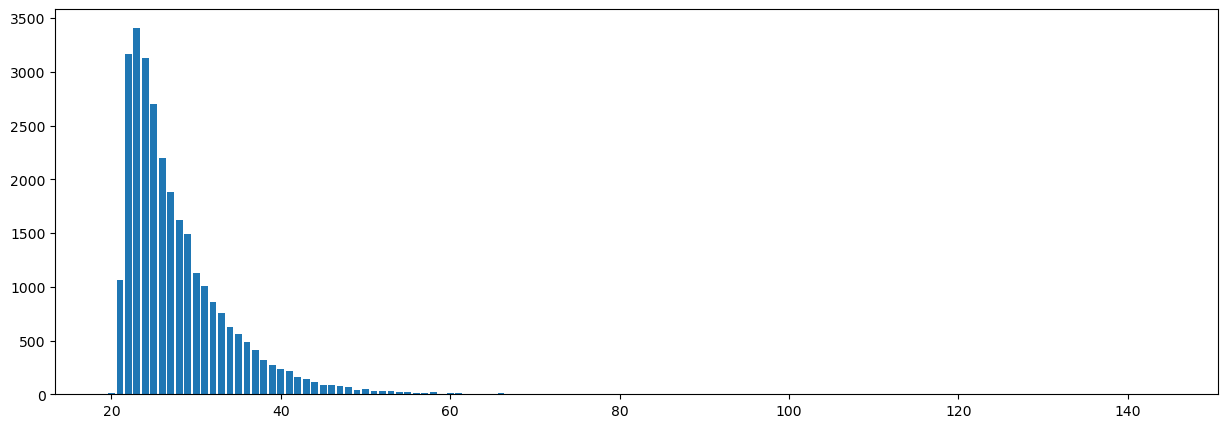

In [11]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [12]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

25

**Creating New Features by Grouping**

In [13]:
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 144
minimum 20


In [14]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [15]:
# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an age between {next} and {arr[i+1]}.')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

print(data.shape[0])   


There are 0 people with an age between 1 and 18.
There are 15682 people with an age between 19 and 26.
There are 10422 people with an age between 27 and 36.
There are 2054 people with an age between 37 and 46.
There are 372 people with an age between 47 and 56.
There are 87 people with an age between 57 and 66.
28633


In [16]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [17]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True)

In [18]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


In [19]:
data.shape

(28633, 14)

**Income Group**

In [20]:
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 2039784
minimum 4000


In [21]:
# people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an income between {next} and {arr[i+1]}.')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

print(data.shape[0]) 


There are 1972 people with an income between 1 and 25000.
There are 10198 people with an income between 25001 and 50000.
There are 8532 people with an income between 50001 and 75000.
There are 4197 people with an income between 75001 and 100000.
There are 3734 people with an income between 100001 and inf.
28633


In [22]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [23]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

**LOAN AMOUNT**

In [24]:
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum {max_loan_amount}")
print(f"minimum {min_loan_amount}")

maximum 35000
minimum 500


In [25]:
# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an loan_amount between {next} and {arr[i+1]}.')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

print(data.shape[0])   

There are 8182 people with an loan_amount between 1 and 5000.
There are 10608 people with an loan_amount between 5001 and 10000.
There are 5430 people with an loan_amount between 10001 and 15000.
There are 4413 people with an loan_amount between 15001 and inf.
28633


In [26]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [27]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [28]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [29]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [30]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [31]:
data['person_home_ownership'].value_counts()


RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [32]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


Creating New Features

# 

In [33]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt'] 

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [34]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [35]:
raw_data = data

# Feature Engineering

In [36]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [37]:
data = data.drop(drop_colums, axis=1)

In [38]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [39]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


In [41]:
print(x_train.shape,x_test.shape)

(22904, 17) (5727, 17)


In [42]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [43]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [45]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [46]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [47]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [48]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [49]:

X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)


In [50]:
X_new.head()
X_new.shape

(22904, 45)

In [51]:
X_new_test.head()


,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35,66000,4.0,3000,6.03,0.05,7,0.045455,0.001333,0.002010
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35,33144,3.0,8400,14.91,0.25,8,0.253440,0.000357,0.001775
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32,36000,4.0,6000,16.07,0.17,10,0.166667,0.000667,0.002678
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,61500,1.0,18000,13.23,0.29,2,0.292683,0.000056,0.000735
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,24000,7.0,2800,10.99,0.12,9,0.116667,0.002500,0.003925


In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [53]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,0.296643,0.045455,0.530868,0.076675
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.543970,0.253440,-0.380924,-0.049526
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,1.038624,0.166667,-0.091820,0.435586
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,-0.939991,0.292683,-0.662616,-0.608033
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,0.791297,0.116667,1.620571,1.105078


# Modeling

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb

In [55]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1,verbose=0) #
lgb = lgb.LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265) 

#best #colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265
#colsample_bytree= 1.0,learning_rate= 0.1,max_depth=11,min_child_weight= 1e-05,num_leaves= 1024,subsample=1.0

In [56]:
clfs = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [57]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [58]:
from sklearn.metrics import precision_score,accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)


In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.7943076654443862
Precision -  0.5565068493150684
For  xgb
Accuracy -  0.9442989348699145
Precision -  0.9782833505687694
For  cat
Accuracy -  0.9427274314649904
Precision -  0.9770833333333333
For  lgb
Accuracy -  0.9006460625109132
Precision -  1.0


In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
#xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
ensemble_accuracy, ensemble_precision = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ", ensemble_accuracy)
print("Precision - ", ensemble_precision)


For ensemble
Accuracy -  0.9360921948664223
Precision -  0.9943693693693694


# Hyperparameter Tuning 

In [62]:
from lightgbm import LGBMRegressor
# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier


In [63]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='accuracy', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.9409    | 0.6902    | 0.1277    | 10.16     | 0.09537   | 0.7051    | 0.7725    |
| 2         | 0.9341    | 0.7275    | 0.03711   | 9.262     | 0.07924   | 0.7396    | 0.9921    |
| 3         | 0.9242    | 0.512     | 0.1275    | 3.018     | 0.02188   | 0.6978    | 0.6518    |
| 4         | 0.9415    | 0.6285    | 0.2523    | 11.02     | 0.0195    | 0.6633    | 0.5358    |
| 5         | 0.9163    | 1.0       | 0.005     | 13.51     | 0.1       | 0.9       | 1.0       |
| 6         | 0.942     | 1.0       | 0.3       | 6.34      | 1e-06     | 0.5       | 0.5       |
| 7         | 0.7953    | 0.5       | 0.005     | 5.456     | 0.1       | 0.9       | 1.0       |
| 8         | 0.9403    | 0.8989    | 0.2731    | 6.366     | 0.02638   | 0.5239    | 0.642     |
| 9         | 0.9428

In [64]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 1e-06,
 'num_leaves': 128,
 'subsample': 0.5025126595829873}

# Feature Importance

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

loan_to_income_ratio          0.234221
loan_int_rate                 0.155432
RENT                          0.124691
person_income                 0.100221
index                         0.046127
person_emp_length             0.036764
MEDICAL                       0.031713
int_rate_to_loan_amt_ratio    0.031216
loan_to_emp_length_ratio      0.029270
DEBTCONSOLIDATION             0.028175
person_age                    0.026478
C                             0.025989
D                             0.019564
loan_percent_income           0.017701
cb_person_cred_hist_length    0.015010
loan_amnt                     0.014072
HOMEIMPROVEMENT               0.010698
OWN                           0.010601
MORTGAGE                      0.004724
EDUCATION                     0.004427
PERSONAL                      0.004337
VENTURE                       0.003398
G                             0.003113
N                             0.002288
Y                             0.002098
26-35                    

# AUTO ML

In [66]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/1

In [67]:
from pycaret.classification import *

In [68]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [69]:
model = setup(data = raw_data, target = 'loan_status', session_id=123) 

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28631, 18)"
4,Transformed data shape,"(28631, 43)"
5,Transformed train set shape,"(20041, 43)"
6,Transformed test set shape,"(8590, 43)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,7


In [70]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9372,0.9432,0.7268,0.9778,0.8337,0.7961,0.8094,7.8160
lightgbm,Light Gradient Boosting Machine,0.9354,0.9415,0.7226,0.9722,0.8290,0.7903,0.8035,1.6790
xgboost,Extreme Gradient Boosting,0.9345,0.9451,0.7360,0.9509,0.8296,0.7899,0.7999,6.1090
rf,Random Forest Classifier,0.9322,0.9268,0.7127,0.9653,0.8199,0.7793,0.7930,4.6050
gbc,Gradient Boosting Classifier,0.9282,0.9246,0.7028,0.9536,0.8092,0.7662,0.7798,5.6940
et,Extra Trees Classifier,0.9238,0.9192,0.7118,0.9181,0.8017,0.7554,0.7649,4.0360
dt,Decision Tree Classifier,0.8864,0.8393,0.7563,0.7295,0.7426,0.6697,0.6700,0.8810
ada,Ada Boost Classifier,0.8860,0.8968,0.6416,0.7929,0.7091,0.6391,0.6448,2.2590
lda,Linear Discriminant Analysis,0.8712,0.8823,0.6077,0.7504,0.6712,0.5922,0.5975,1.0900
ridge,Ridge Classifier,0.8652,0.0000,0.5379,0.7708,0.6331,0.5538,0.5675,0.7540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [71]:
model = setup(data = data_original, target = 'loan_status', session_id=123) 

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


In [72]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9356,0.9440,0.7252,0.9728,0.8309,0.7922,0.8053,7.4640
lightgbm,Light Gradient Boosting Machine,0.9350,0.9458,0.7230,0.9716,0.8291,0.7900,0.8032,1.5610
xgboost,Extreme Gradient Boosting,0.9340,0.9499,0.7397,0.9460,0.8301,0.7899,0.7992,4.4120
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,4.2790
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,3.8740
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,3.8920
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.7570
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,1.8560
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.9880
ridge,Ridge Classifier,0.8571,0.0000,0.5031,0.7609,0.6056,0.5227,0.5395,0.6640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [73]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [74]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9388,0.9480,0.7393,0.9741,0.8406,0.8036,0.8153


In [75]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 708.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 14.2 MB

In [76]:
from sklearn.model_selection import train_test_split

#split dataframe into train and test sets
train, test = train_test_split(data, test_size=0.2,random_state=12)

#print size of each set
print(train.shape, test.shape)


(22904, 18) (5727, 18)


In [77]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
8981,23,66000,MORTGAGE,5.0,VENTURE,A,6000,6.62,0,0.09,N,2,20-25,middle,medium,0.090909,0.000833,0.001103
27638,44,95000,MORTGAGE,4.0,VENTURE,B,10000,10.95,0,0.11,N,15,36-45,high-middle,medium,0.105263,0.000400,0.001095
2128,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4,20-25,low-middle,very large,0.710849,0.000132,0.000271
25179,34,90000,MORTGAGE,19.0,VENTURE,C,5000,13.61,0,0.06,Y,8,26-35,high-middle,small,0.055556,0.003800,0.002722
5763,23,50000,MORTGAGE,6.0,VENTURE,A,7000,5.99,0,0.14,N,3,20-25,low-middle,medium,0.140000,0.000857,0.000856


In [78]:
from autogluon.tabular import TabularDataset, TabularPredictor



predictor = TabularPredictor(label='loan_status').fit(train_data=train)
predictions = predictor.predict(test)

No path specified. Models will be saved in: "AutogluonModels/ag-20230710_093138/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230710_093138/"
AutoGluon Version:  0.8.2
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Jun 28 11:06:41 UTC 2023
Disk Space Avail:   20.94 GB / 20.96 GB (99.9%)
Train Data Rows:    22904
Train Data Columns: 17
Label Column: loan_status
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:

In [79]:
predictor.evaluate(test, silent=True)

{'accuracy': 0.9359175833769862,
 'balanced_accuracy': 0.8551055326553403,
 'mcc': 0.8065049060839535,
 'roc_auc': 0.9407888177774846,
 'f1': 0.828424497428705,
 'precision': 0.9899441340782122,
 'recall': 0.7122186495176849}

In [80]:
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.935918,0.931471,0.189066,0.111167,18.483297,0.004675,0.008561,2.842846,2,True,14
1,CatBoost,0.935743,0.929725,0.023459,0.024389,10.968482,0.023459,0.024389,10.968482,1,True,7
2,XGBoost,0.935743,0.928416,0.062174,0.036073,2.599052,0.062174,0.036073,2.599052,1,True,11
3,LightGBMLarge,0.935045,0.928852,0.042584,0.025824,3.727071,0.042584,0.025824,3.727071,1,True,13
4,LightGBM,0.934171,0.930162,0.034775,0.023046,1.670916,0.034775,0.023046,1.670916,1,True,4
5,LightGBMXT,0.931552,0.926233,0.126156,0.055171,3.001053,0.126156,0.055171,3.001053,1,True,3
6,RandomForestEntr,0.929806,0.924051,0.503948,0.218231,15.409749,0.503948,0.218231,15.409749,1,True,6
7,RandomForestGini,0.928584,0.921432,0.527086,0.213008,14.807396,0.527086,0.213008,14.807396,1,True,5
8,NeuralNetFastAI,0.925266,0.924051,0.197975,0.077581,43.254390,0.197975,0.077581,43.254390,1,True,10
9,ExtraTreesEntr,0.921425,0.915321,0.648967,0.269318,6.561208,0.648967,0.269318,6.561208,1,True,9
